<h1> VIDEO GAME SALES ANALYSIS </h1>
<h2> Team DataGrid </h2>
<h3> NIKITH KB (PES2UG20CS529) <BR>
POORVI DESHPANDE (PES2UG20CS532) <H3>

Dataset used: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings


In [ ]:
import numpy as np
import csv
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

#Data Cleaning

# cannot use or fill null values in year and platform column and hence remove
# sort data by release of games
data = pd.read_csv("Video_Games.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
data.insert(0, "Rank", data.index.to_numpy()+1)
data = data.sort_values(by = "Year_of_Release")
data = data[(data['Year_of_Release']).notna()]
data = data[data['Platform'].notna()]
data

,Rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
262,263,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,NaN,NaN,NaN,NaN,NaN,NaN
5360,5361,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34,NaN,NaN,NaN,NaN,NaN,NaN
546,547,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,NaN,NaN,NaN,NaN,NaN,NaN
2650,2651,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77,NaN,NaN,NaN,NaN,NaN,NaN
4019,4020,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.00,0.01,0.49,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2205,Rise of the Tomb Raider,PS4,2016.0,Adventure,Square Enix,0.23,0.53,0.04,0.14,0.94,NaN,NaN,NaN,NaN,NaN,NaN
16222,16223,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
14086,14087,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16385,16386,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Assessing null values in data
Data with no name and genre are dropped as it cannont be determined without inherent input

In [ ]:
data.isna().sum()

Rank                  0
Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         6610
User_Count         8987
Developer          6543
Rating             6681
dtype: int64

In [ ]:
data.dropna(axis=0, subset=['Name'], inplace = True)
data.dropna(axis=0, subset=['Genre'], inplace = True)

# Visualization of data to observe outliers and to derive interpretations

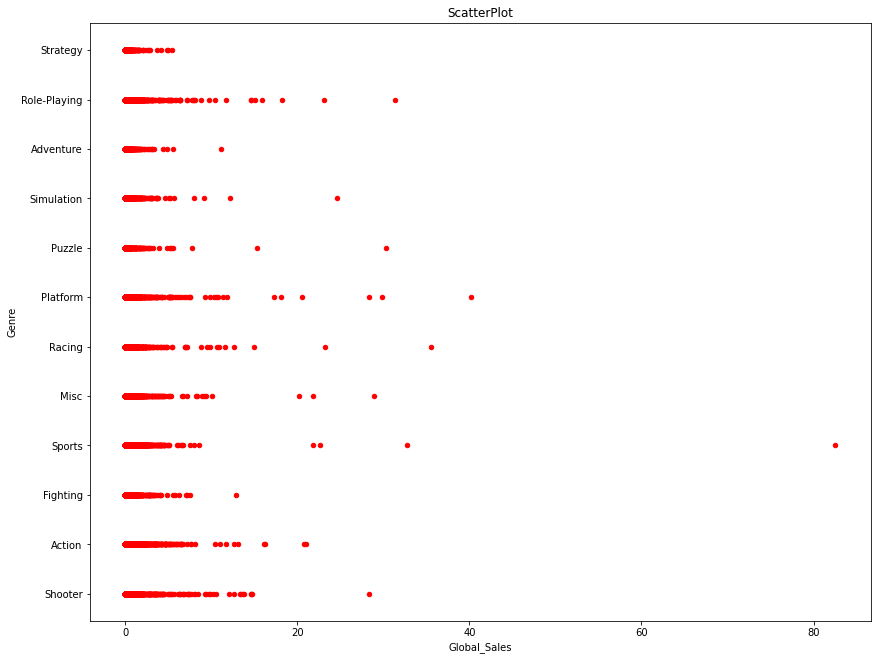

In [ ]:
# scatter plot to observe outliers 
# sports genre contain the highest size of outliers

data.plot(kind = 'scatter',
  x = 'Global_Sales',
  y = 'Genre',
  color = 'red', figsize=(14, 11))


# set the title
plt.title('ScatterPlot')

# show the plot
plt.show()


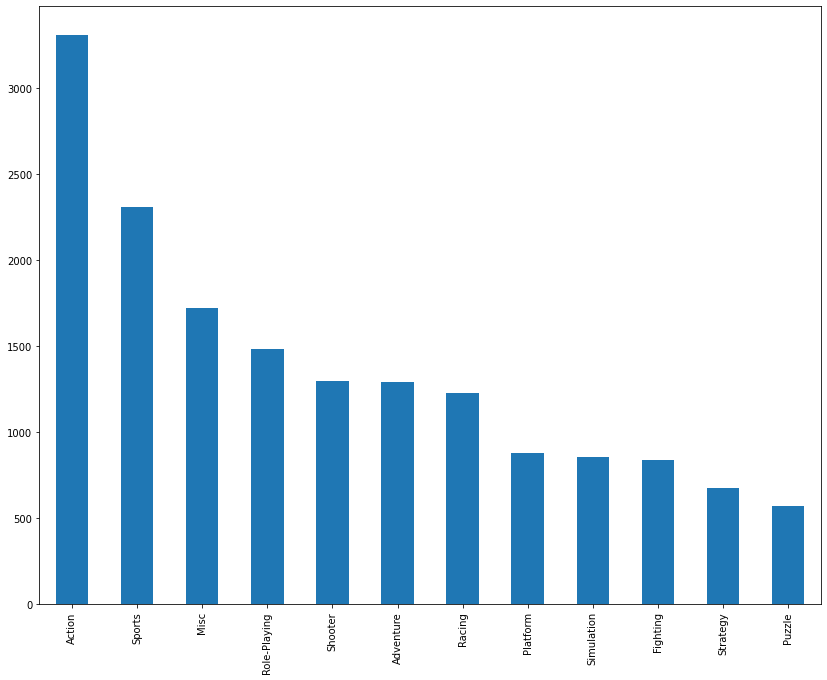

In [ ]:
#Visual representation of higher selling genres across the world
f, ax = plt.subplots(figsize=(14, 11))
data['Genre'].value_counts().plot.bar()

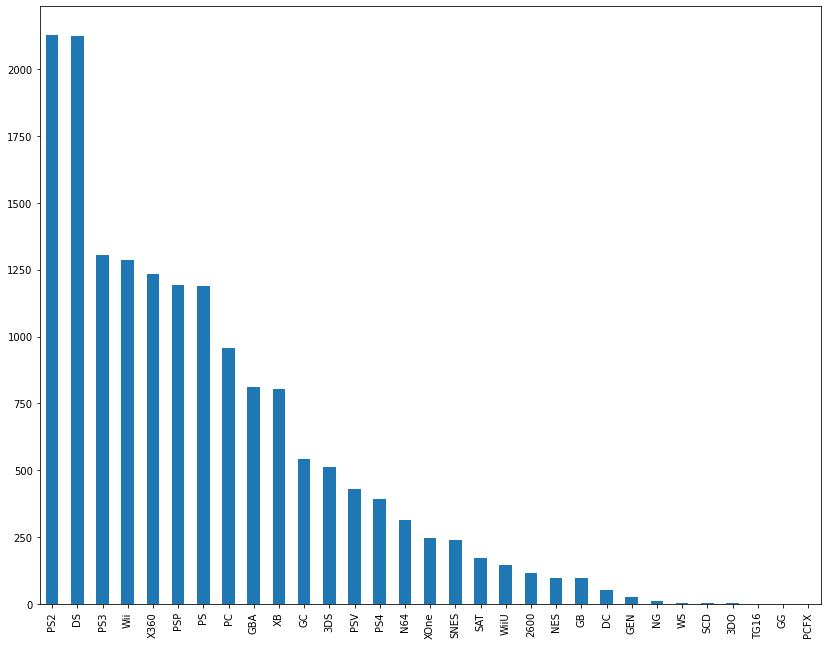

In [ ]:
#Visual representation of amount of games released on different platforms
f, ax = plt.subplots(figsize=(14, 11))
data['Platform'].value_counts().plot.bar()

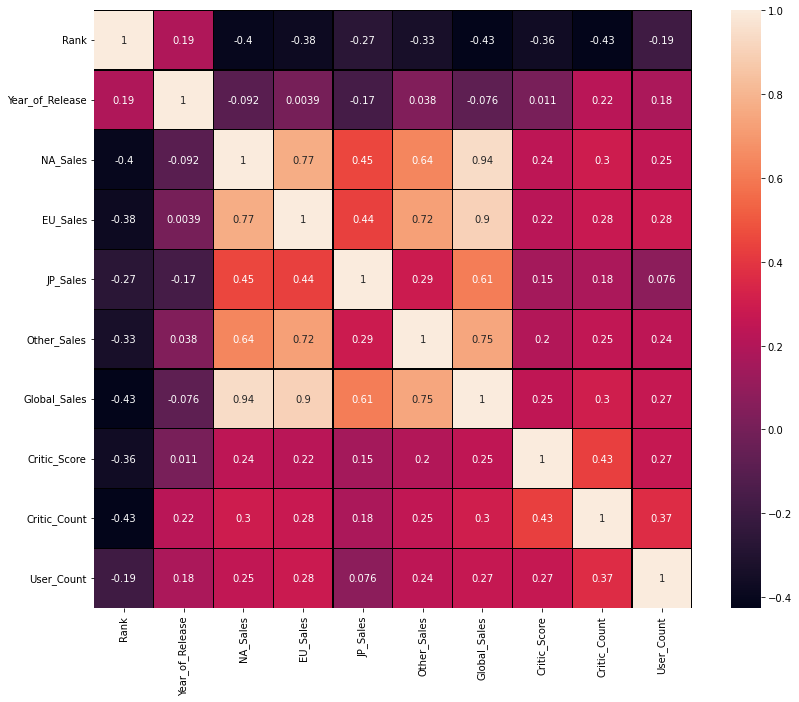

In [ ]:
# corelation graph for variables 
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0, 
            square=True, linecolor='k', annot=True)
plt.show()

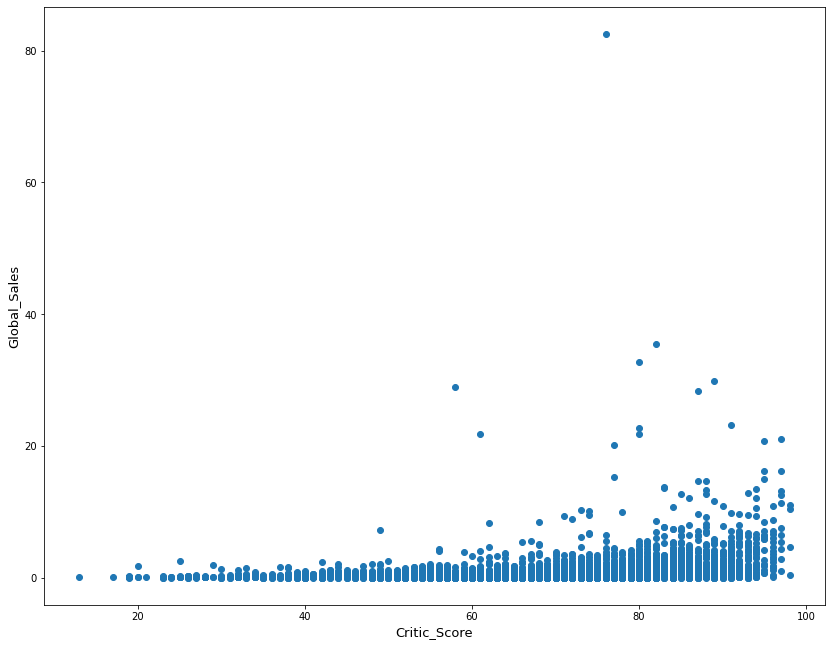

In [ ]:
# plotting critic scores against global sales of video games 
f, ax = plt.subplots(figsize=(14, 11))
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

###Removing visible outlier from data

In [ ]:
# removing visible outliers in global sales for values above 60
data = data.drop(data[(data['Critic_Score']>60) & (data['Global_Sales']>60)].index)

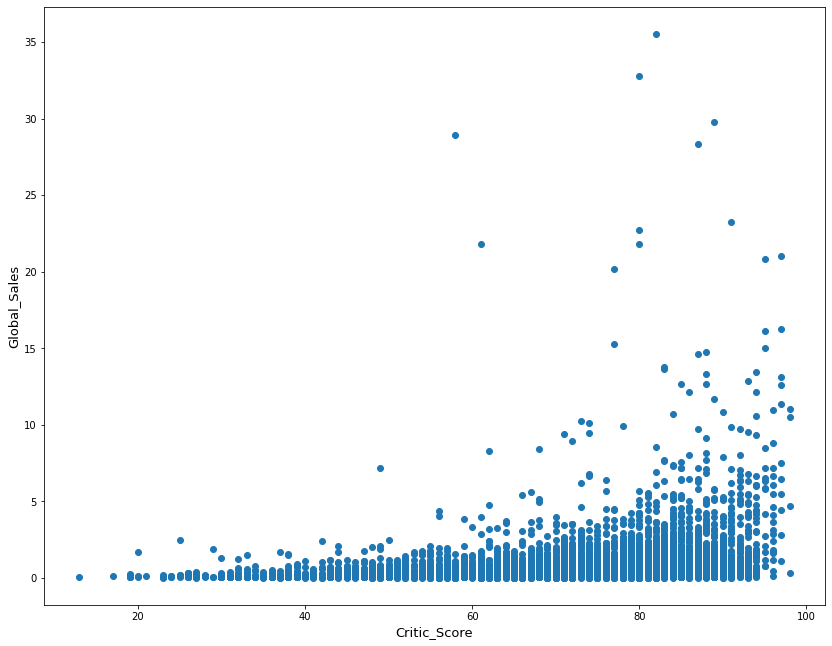

In [ ]:
f, ax = plt.subplots(figsize=(14, 11))
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

Removing lots of data that resembles outliers could potentially lead to more variation from the original data and could be considered as "tampering"


 mu = 0.53 and sigma = 1.42



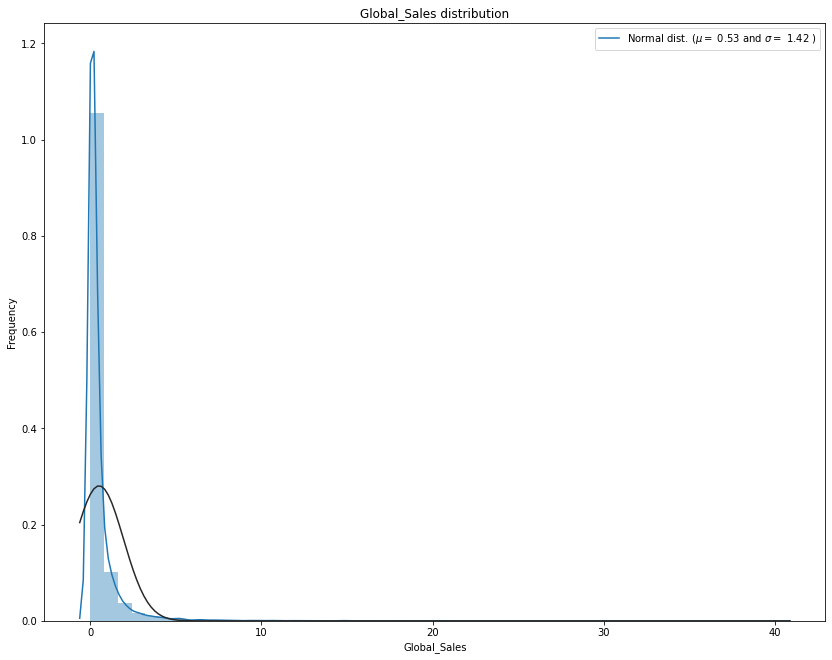

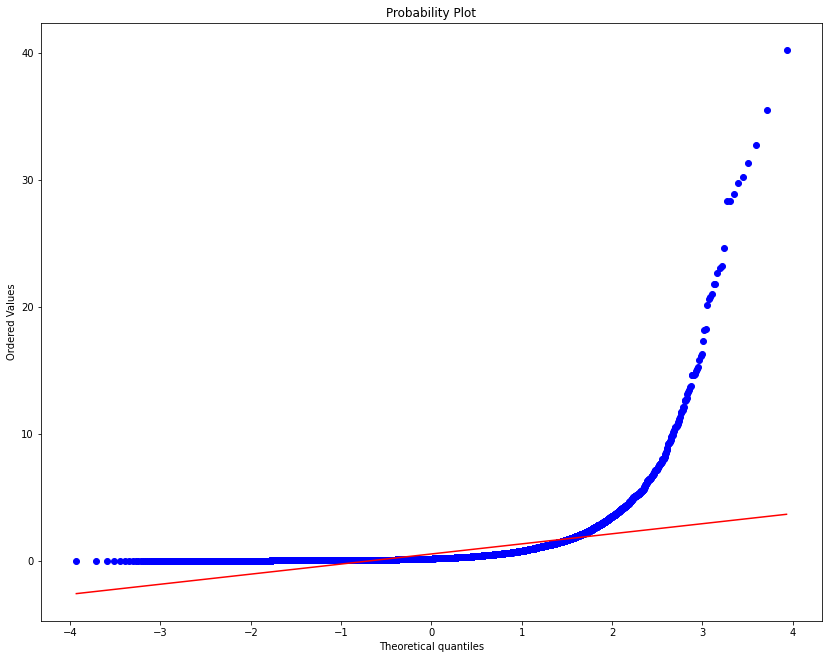

<Figure size 432x288 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(14, 11))
sns.distplot(data['Global_Sales'] , fit=norm);

# Get the fitted parameters
(mu, sigma) = norm.fit(data['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

# QQ-plot
fig, ax = plt.subplots(figsize=(14, 11))
res = stats.probplot(data['Global_Sales'], plot=plt)
fig = plt.figure()
plt.show()

In [ ]:
# finding percentage of missing values for each column 
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.630024
Critic_Score,51.468353
Critic_Count,51.468353
Rating,40.609230
User_Score,40.177540
Developer,39.770171
Publisher,0.194564


In [ ]:
print(pd.value_counts(data["Platform"]))

PS2     2127
DS      2122
PS3     1306
Wii     1285
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      431
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [ ]:
data = data[
    (data['Platform'] == 'PS3') | 
    (data['Platform'] == 'PS4') | 
    (data['Platform'] == 'X360') | 
    (data['Platform'] == 'XOne') | 
    (data['Platform'] == 'Wii') | 
    (data['Platform'] == 'WiiU') | 
    (data['Platform'] == 'PC')]

# checking value counts 
print(pd.value_counts(data["Platform"]))

# shape of the data again
print(data.shape)

# missing data ratios
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1306
Wii     1285
X360    1232
PC       957
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5567, 17)


,Missing Ratio
Critic_Score,37.578588
Critic_Count,37.578588
User_Count,34.488953
Rating,23.765044
User_Score,22.471708
Developer,21.807077
Publisher,0.089815


In [ ]:
data = data.dropna(subset=['Critic_Score'])

# shape of data
print(data.shape)

# missing values ratio
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(3475, 17)


,Missing Ratio
User_Count,4.863309
Rating,1.985612
User_Score,0.460432
Developer,0.086331
Publisher,0.028777


In [ ]:
# filling categorical missing values with mode values
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0]);
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0]);
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0]);
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median());

In [ ]:
# filling numerical missing values with median values 
data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())

In [ ]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


missing values removed 

In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head 

(3475, 17)
(3475, 38)


<bound method NDFrame.head of         Rank                                  Name  Year_of_Release  \
14472  14473                             Alter Ego           1985.0   
14623  14624                               SimCity           1988.0   
14612  14613                                  Doom           1992.0   
2014    2015                           Tomb Raider           1996.0   
1160    1161                                Diablo           1996.0   
...      ...                                   ...              ...   
13228  13229          Hatsune Miku: Project Diva X           2016.0   
4033    4034  Plants vs. Zombies: Garden Warfare 2           2016.0   
10528  10529               The Sims 4: City Living           2016.0   
15736  15737           Prototype: Biohazard Bundle           2016.0   
10726  10727                         EVE: Valkyrie           2016.0   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
14472         Activision      0.00      0.03  

In [ ]:
data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

In [ ]:
print(data.columns) 

X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

print(X.shape)
print(Y.shape)

Index(['Rank', 'Year_of_Release', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Platform_PC',
       'Platform_PS3', 'Platform_PS4', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')
(3475, 29)
(3475, 1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#L checking shape of split data
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2606, 29)
Y_train shape: (2606, 1)
X_test shape: (869, 29)
Y_test shape: (869, 1)


In [ ]:
# numpy fuction log1p applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)


 mu = 0.43 and sigma = 0.48



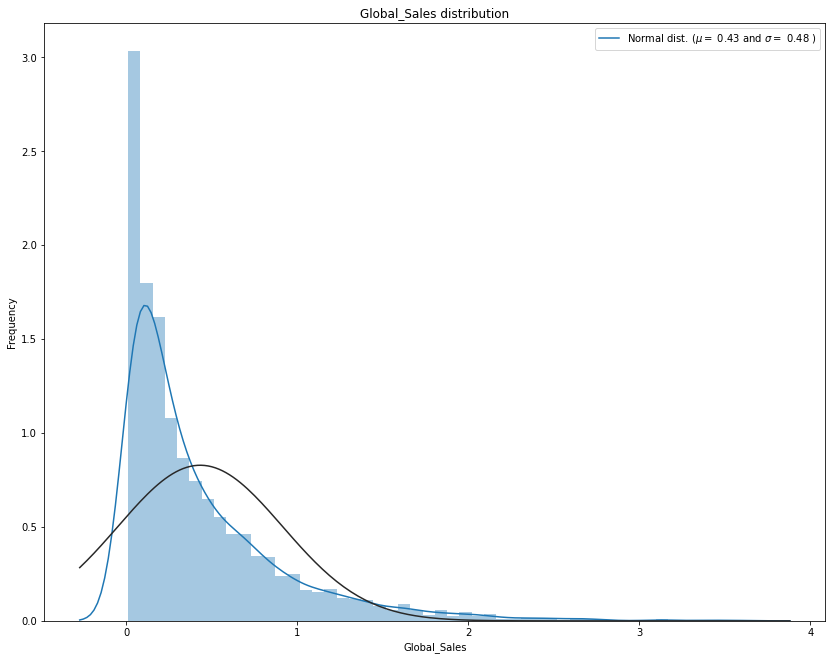

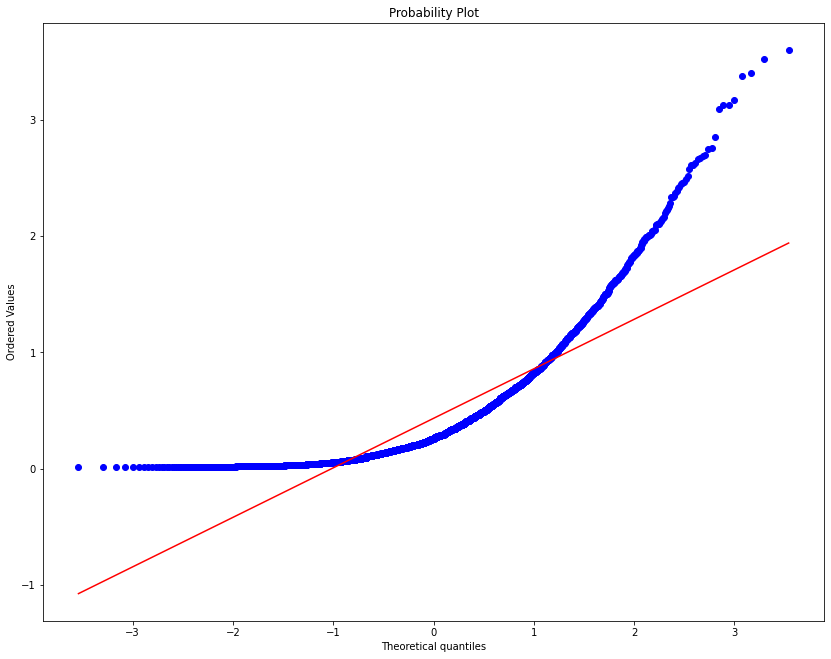

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_log_transformed = np.log1p(data['Global_Sales']) 
f, ax = plt.subplots(figsize=(14, 11))
sns.distplot(Y_log_transformed , fit=norm);

# get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_log_transformed)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

# QQ-plot
fig, ax = plt.subplots(figsize=(14, 11))
res = stats.probplot(Y_log_transformed, plot=plt)
fig = plt.figure()
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid_lr = [
    {}
]

# Parameter grid for lasso
param_grid_lasso = [
    {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [1000000, 100000, 10000, 1000]}
]

# Parameter grid for Ridge Regression
param_grid_rr = [
    {'alpha': [100, 10, 1, 0.1, 0.01, 0.001]}
]

# Parameter grid for Support Vector Regressor
param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]

# Parameter grid for Random Forest
param_grid_rf = [
    {'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2,4,6,8,10,12], 'max_depth': [2, 3, 5, 7, 9]}
]

# Parameter grid for Gradient Boosting Regressor
param_grid_gbr = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

# Parameter grid for MLPRegressor. 
param_grid_mlpr = [
    {'hidden_layer_sizes': [(10,5)], 'solver': ['lbfgs'], 'batch_size': [200],
     'learning_rate': ['adaptive'], 'max_iter': [800], 'verbose': [True], 
     'nesterovs_momentum': [True], 'early_stopping': [True], 'validation_fraction': [0.12],
     'random_state': [100], 'alpha': [0.1], 'activation': ['logistic']}
]

In [ ]:
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error',  cv=5)
grid_search_lr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))
lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lr_score)))

Best parameters: {}
Best cross-validation score: 0.43
Test set score: 0.39


In [ ]:
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
lasso_best_cross_val_score = (np.sqrt(-grid_search_lasso.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lasso_best_cross_val_score)))
lasso_score = np.sqrt(-grid_search_lasso.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lasso_score)))

Best parameters: {'alpha': 0.001, 'max_iter': 1000000}
Best cross-validation score: 0.43
Test set score: 0.39


In [ ]:
grid_search_rr = GridSearchCV(Ridge(), param_grid_rr, cv=5, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rr.best_params_))
rr_best_cross_val_score = (np.sqrt(-grid_search_rr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rr_best_cross_val_score)))
rr_score = np.sqrt(-grid_search_rr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rr_score)))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.43
Test set score: 0.39


In [ ]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))

Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best cross-validation score: 0.48
Test set score: 0.46


In [ ]:
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rf.best_params_))
rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))
rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rf_score)))

In [ ]:
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(gbr_score)))

Best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 250}
Best cross-validation score: 0.32
Test set score: 0.31


In [ ]:
grid_search_mlpr = GridSearchCV(MLPRegressor(), param_grid_mlpr, cv=5, scoring='neg_mean_squared_error')
res = grid_search_mlpr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_mlpr.best_params_))
mlpr_best_cross_val_score = (np.sqrt(-grid_search_mlpr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(mlpr_best_cross_val_score)))
mlpr_score = np.sqrt(-grid_search_mlpr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(mlpr_score)))

Best parameters: {'activation': 'logistic', 'alpha': 0.1, 'batch_size': 200, 'early_stopping': True, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'adaptive', 'max_iter': 800, 'nesterovs_momentum': True, 'random_state': 100, 'solver': 'lbfgs', 'validation_fraction': 0.12, 'verbose': True}
Best cross-validation score: 0.40
Test set score: 0.37


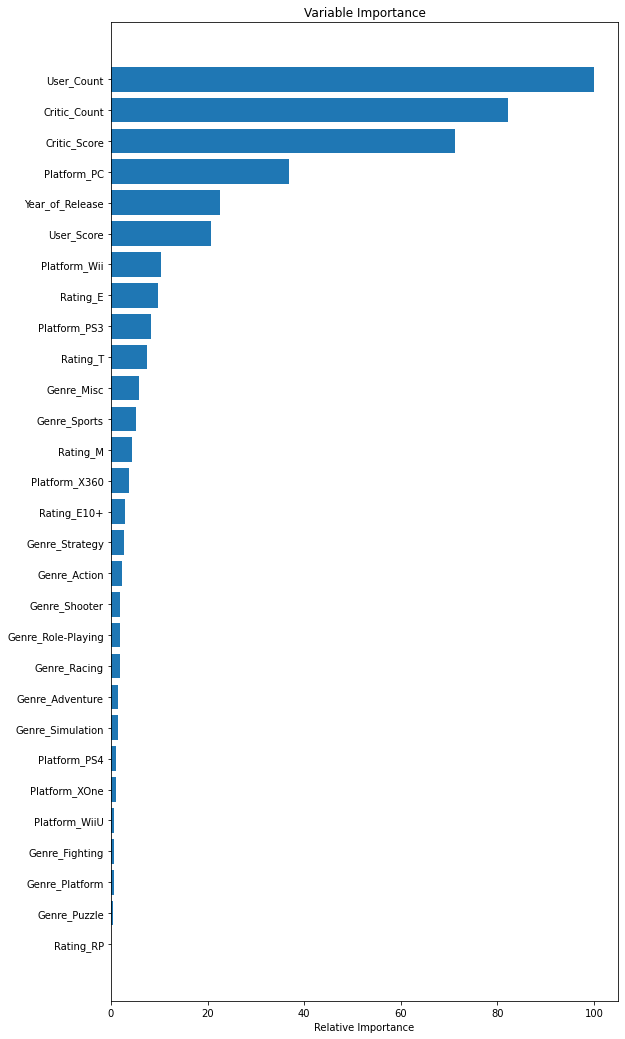

In [ ]:
# Plot feature importance
feature_importance = grid_search_gbr.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,18))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx]) 
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()